In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/wzhang/Documents/AgInjuryNews - cleaned.csv')

X = pd.DataFrame(dataset.iloc[:,0:14].values)
Y = pd.DataFrame(dataset.iloc[:,14:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

     0   1   2   3   4   5   6   7   8   9   10  11  12  13
0     1   3   1  79   7   0   0   0   0   0   0   0   0   0
1     3   2   1  84   6   0   0   0   0   0   0   0   0   0
2     3   1   1  87   7   0   0   0   0   0   0   0   0   0
3     3   2   2  65   7   0   0   0   0   0   0   0   0   0
4     3   1   1  63   7   0   0   0   0   0   0   0   0   0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
966   1   3   1  63   1   0   0   0   0   0   0   0   0   0
967   1   2   1  64   7   0   0   0   0   0   0   0   0   0
968   1   2   1  85   6   0   0   0   0   0   0   0   0   0
969   3   3   1  77   7   0   0   1   0   0   0   0   0   0
970   1   2   1  64   7   0   0   0   0   0   0   0   0   0

[971 rows x 14 columns]
     0
0    1
1    1
2    1
3    0
4    1
..  ..
966  1
967  1
968  1
969  1
970  1

[971 rows x 1 columns]
(776, 14)
(776, 1)


In [2]:
features = pd.DataFrame(dataset.iloc[:,0:14])
features = features.columns
print(features)

Index(['Location ', 'Time ', 'Sex', 'Age', 'Injury_Agent', 'Confined Space',
       'Grain Involved', 'Drowning/Suffocation', 'Alcohol/Drugs', 'Seatbelt',
       'Helmet', 'ROPS', 'Agritourism', 'Other PPE'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

2024-07-12 08:56:46.890615: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model = xgb.XGBClassifier(n_bits = 6)
model.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [08:56:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_bits" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_bits=6, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [5]:
res = model.predict(X_test)
print(Y_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

     0
293  1
571  1
669  1
202  1
565  1
..  ..
690  1
481  1
6    0
650  1
174  1

[195 rows x 1 columns]
              precision    recall  f1-score   support

           0   0.322581  0.232558  0.270270        43
           1   0.798780  0.861842  0.829114       152

    accuracy                       0.723077       195
   macro avg   0.560681  0.547200  0.549692       195
weighted avg   0.693772  0.723077  0.705882       195



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


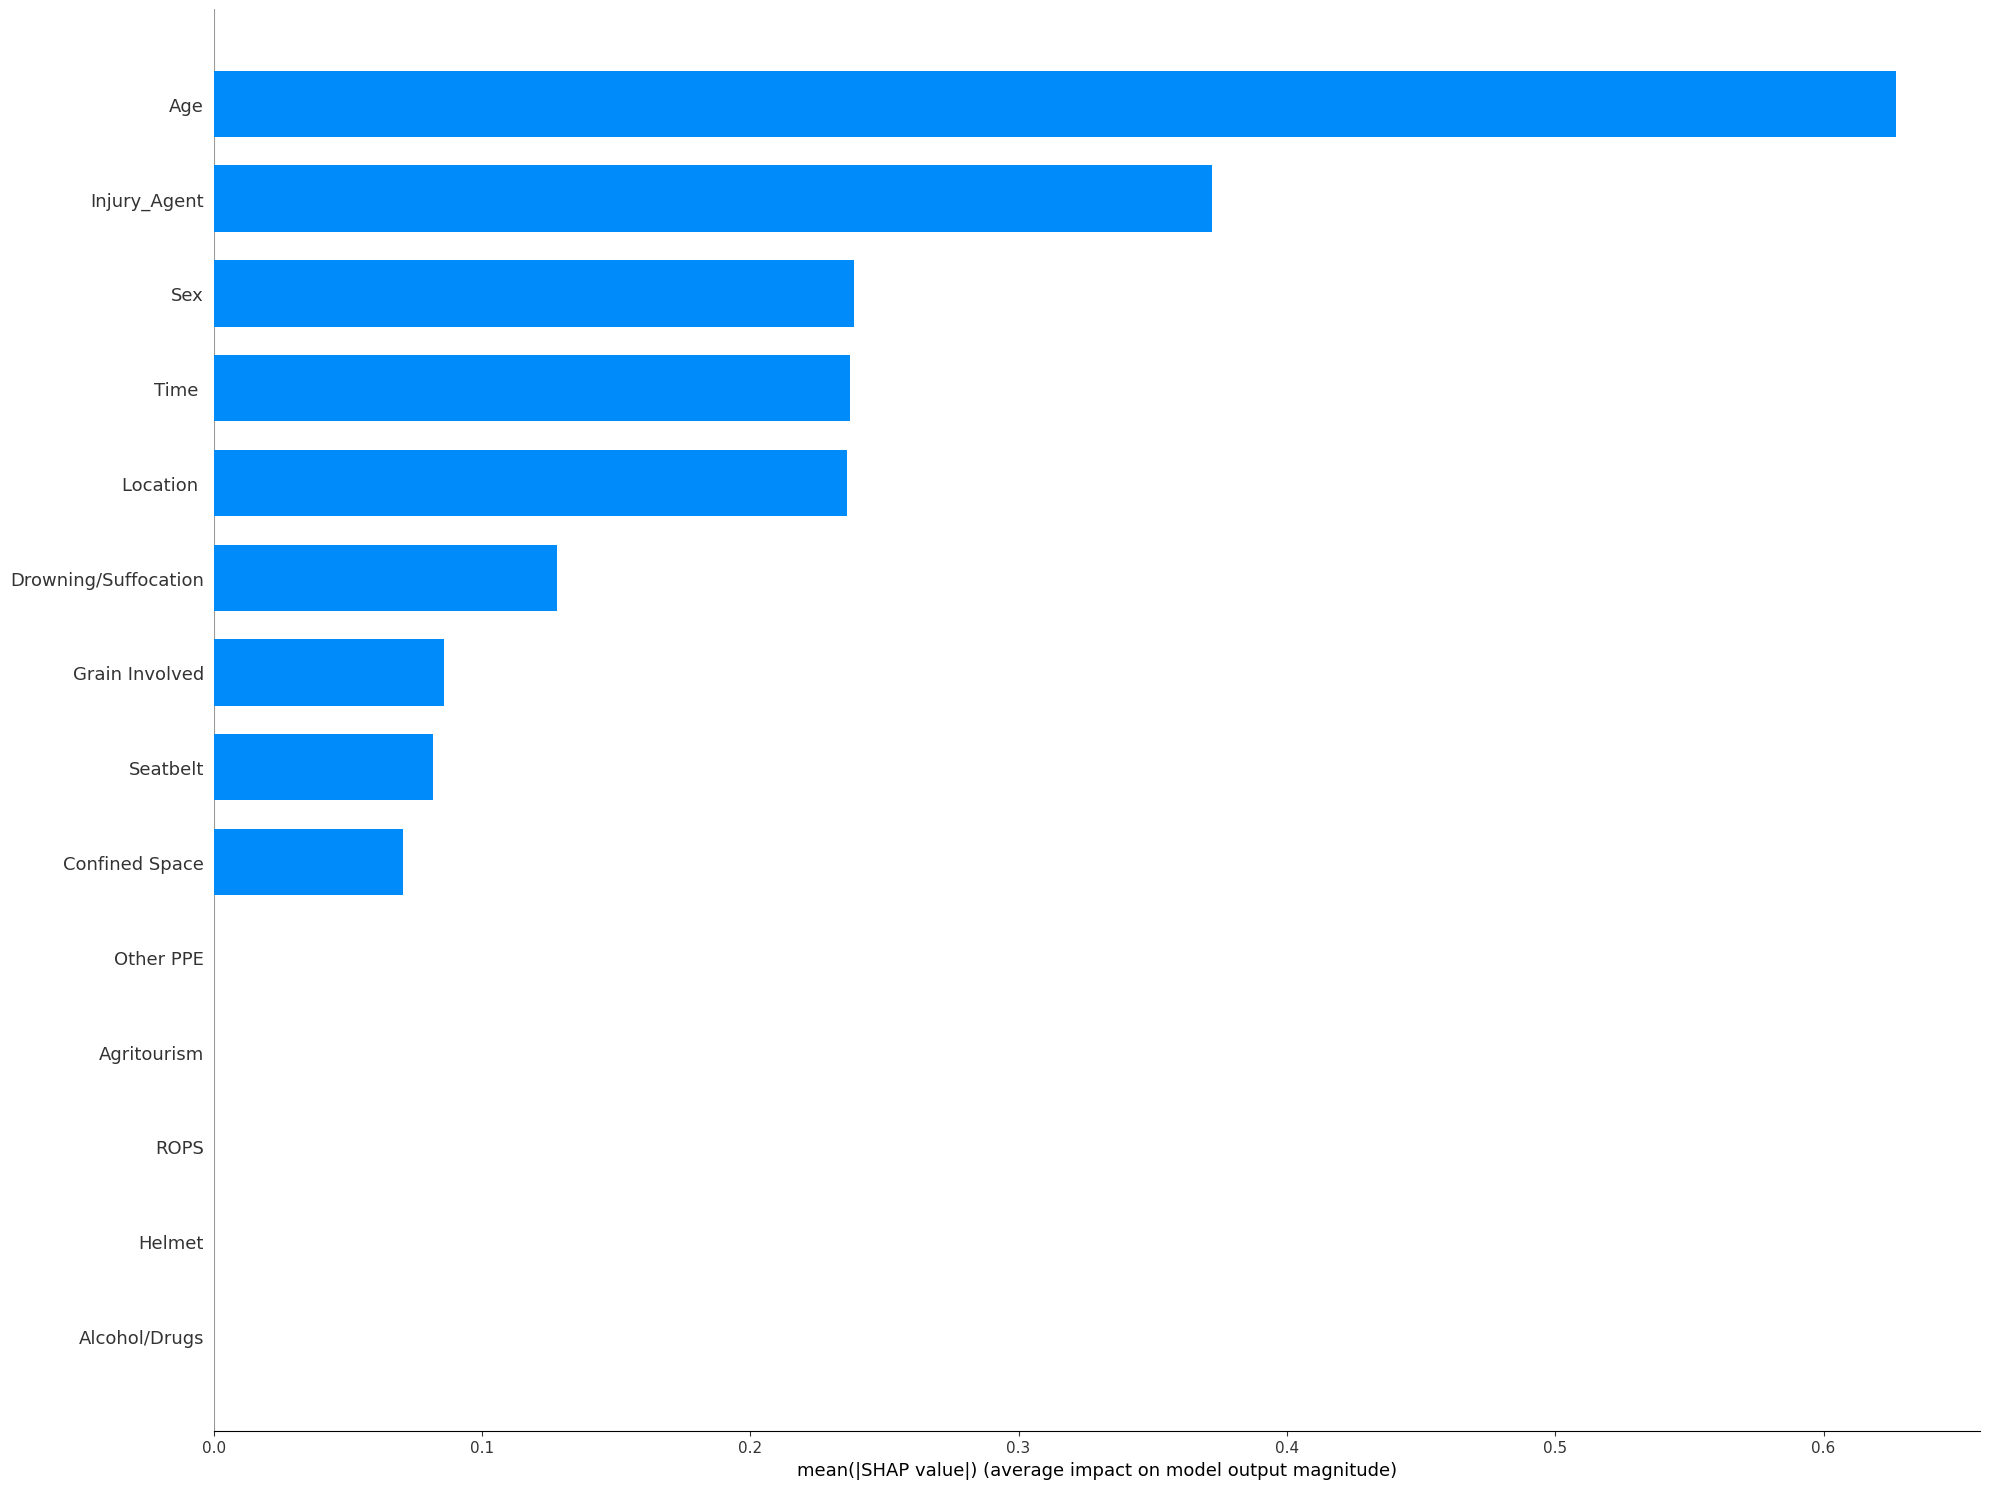

In [6]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)